In [1]:
#import libraries
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('TSLA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [3]:
#shifting the columns by 1 (in order to be able to start at index 1)
series_shifted = df['Close'].shift()
df['Prev_Close'] = series_shifted
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Prev_Close
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,NaN
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,1.592667
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,1.588667
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,1.464000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,1.280000


In [5]:
df.shape

(3491, 8)

In [6]:
#checking for null entries
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
Prev_Close    1
dtype: int64

In [7]:
#removing/dropping null row
df.dropna(inplace = True)
df

,Date,Open,High,Low,Close,Adj Close,Volume,Prev_Close
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,1.592667
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,1.588667
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,1.464000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,1.280000
5,2010-07-07,1.093333,1.108667,0.998667,1.053333,1.053333,103825500,1.074000
...,...,...,...,...,...,...,...,...
3486,2024-05-06,183.800003,187.559998,182.199997,184.759995,184.759995,84390300,181.190002
3487,2024-05-07,182.399994,183.259995,177.399994,177.809998,177.809998,75045900,184.759995
3488,2024-05-08,171.589996,176.059998,170.149994,174.720001,174.720001,79969500,177.809998
3489,2024-05-09,175.009995,175.619995,171.369995,171.970001,171.970001,65701300,174.720001


<Axes: >

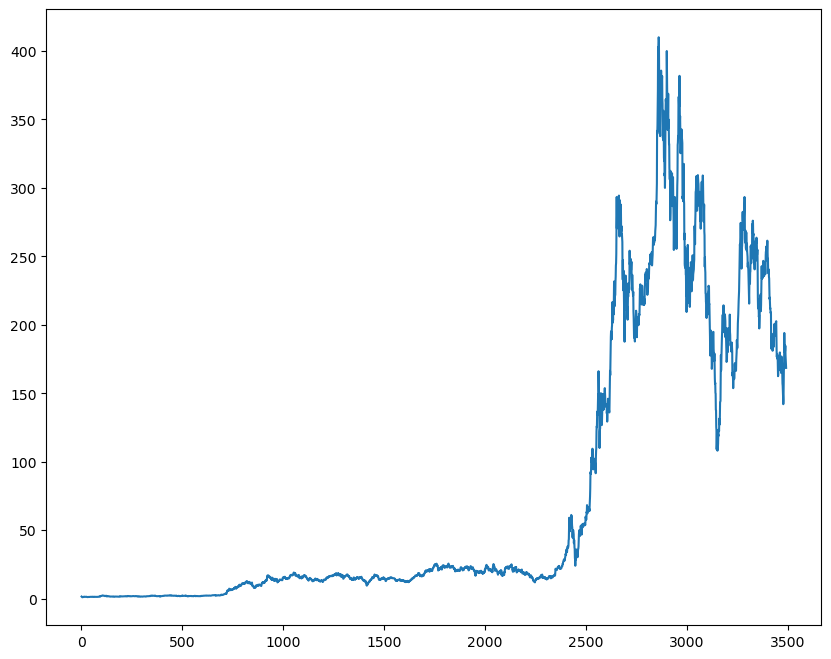

In [47]:
#plotting close prices (since 2010 to 2024)
df['Close'].plot(figsize=(10,8))

In [16]:
#X and Y
x = df[['Open','Prev_Close']]
y = df['Close']

In [17]:
#splitting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [19]:
print(x_train.shape, x_test.shape)
#(2617, 2) for training, (873, 2) for testing

(2617, 2) (873, 2)


In [37]:
#linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [38]:
 #plotting regressor () 0.96833798 = (0.03170807 * Prev_Close) + 0.05974673025482957
print(regressor.coef_)
print(regressor.intercept_)

[0.96833798 0.03170807]
0.05974673025482957


In [39]:
#predicted value
predicted = regressor.predict(x_test)
print(x_test)

            Open  Prev_Close
1769   20.860001   20.881332
2296   15.254000   15.267333
225     1.802000    1.756667
46      1.358000    1.363333
2455   33.416668   33.475334
...          ...         ...
2213   17.908667   17.846666
354     2.162667    2.173333
1268   17.473333   17.477333
2542   99.667336   99.000000
2806  227.616669  224.490005

[873 rows x 2 columns]


In [40]:
_df = pd.DataFrame({"Actual": y_test, "Predicted": predicted})
print(_df)

          Actual   Predicted
1769   21.070000   20.921385
2296   15.666667   15.314872
225     1.880000    1.860392
46      1.404000    1.417978
2455   34.933334   33.479814
...          ...         ...
2213   17.758667   17.967273
354     2.117333    2.222852
1268   17.709999   17.534011
2542   99.133331   99.710513
2806  226.753326  227.587758

[873 rows x 2 columns]


In [41]:
regressor.score(x_test, y_test)

0.9984312112008681

In [43]:
import math 
print("Mean Absolute Error ", metrics.mean_absolute_error(y_test, predicted))
print("Mean Square Error ", metrics.mean_squared_error(y_test, predicted))
print("Root Mean Error ", math.sqrt(metrics.mean_absolute_error(y_test, predicted)))
rmse = metrics.mean_squared_error(y_test, predicted, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error  1.7626187128851434
Mean Square Error  16.726437303351823
Root Mean Error  1.3276365138414743
Root Mean Squared Error (RMSE): 4.089796731299958


In [44]:
predicted = regressor.predict(x)
print(predicted)

[  1.77514258   1.72401726   1.59095193 ... 171.8548692  175.06860629
 173.04473313]


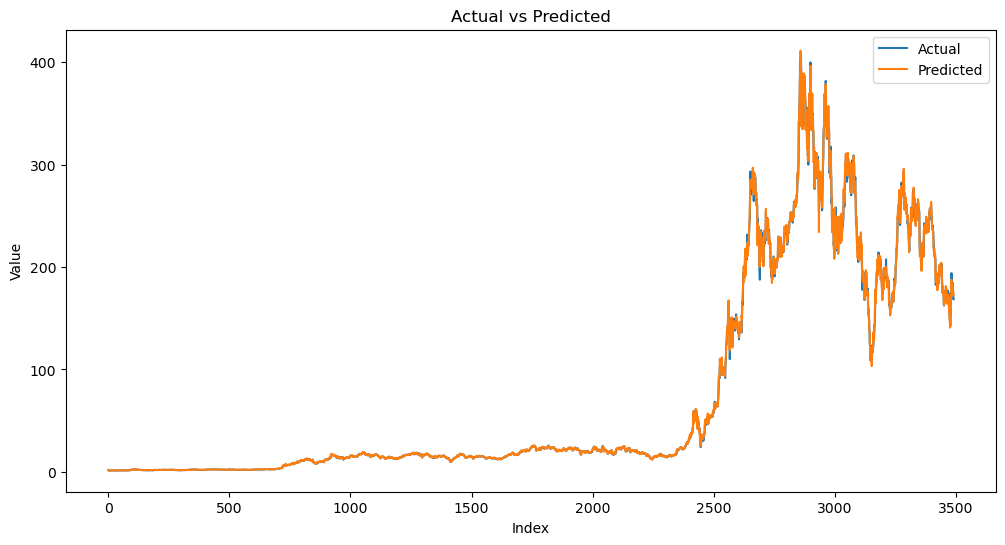

In [46]:
#plot the graph
plt.figure(figsize=(12, 6))
plt.plot(y, label="Actual")
plt.plot(predicted, label="Predicted")
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()